# The BigMart Sales Challenge

In [1]:
# Import required packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
sns.set(rc={'figure.figsize':(13,10)})

In [3]:
train = pd.read_csv('Train.csv', sep=',')
test = pd.read_csv('Test.csv', sep=',')

In [4]:
train.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [11]:
train.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Organise and handle the missing values


In [42]:
#item_avg_weight = train.pivot_table(values='Item_Weight', index='Item_Identifier')
#miss_weight = train['Item_Weight'].isnull()
#train.loc[miss_weight, 'Item_Weight'] = train.loc[miss_weight,'Item_Identifier'].apply(lambda x: item_avg_weight[x])

In [5]:
train['Item_Weight'] = train['Item_Weight'].fillna((train['Item_Weight'].mean()))

In [6]:
from scipy.stats import mode

In [7]:
outlet_size_mode = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: mode(x).mode[0])
outlet_size_mode

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium

In [8]:
miss_outlet = train.Outlet_Size.isnull()

In [9]:
train.loc[miss_outlet, 'Outlet_Size'] = train.loc[miss_outlet,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [10]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
train.sample(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3819           FDD26     8.710000          Regular         0.072142   
2487           FDV22    14.850000          Regular         0.016635   
2675           NCJ31    12.857645               LF         0.181769   
4184           FDN03    12.857645          Regular         0.026421   
6493           FDS56     5.785000          Regular         0.038750   
6545           FDP37    15.600000          Low Fat         0.143689   
5903           FDI52    18.700000          Low Fat         0.104658   
2033           FDS33     6.670000          Regular         0.123620   
6011           FDY13    12.100000               LF         0.030174   
6046           FDA44    19.700000          Low Fat         0.053305   

                  Item_Type  Item_MRP Outlet_Identifier  \
3819                 Canned  183.3924            OUT035   
2487            Snack Foods  157.5630            OUT010   
2675                 Others  240.6196            OUT027   
4184                   Meat  250.9408            OUT019   
6493  Fruits and Vegetables  262.0252            OUT035   
6545              Breakfast  128.1994            OUT018   
5903           Frozen Foods  121.2072            OUT035   
2033            Snack Foods   90.0514            OUT049   
6011                 Canned   76.6670            OUT049   
6046  Fruits and Vegetables   58.1930            OUT049   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3819                       2004       Small               Tier 2   
2487                       1998       Small               Tier 3   
2675                       1985      Medium               Tier 3   
4184                       1985       Small               Tier 1   
6493                       2004       Small               Tier 2   
6545                       2009      Medium               Tier 3   
5903                       2004       Small               Tier 2   
2033                       1999      Medium               Tier 1   
6011                       1999      Medium               Tier 1   
6046                       1999      Medium               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
3819  Supermarket Type1          2776.3860  
2487      Grocery Store           312.9260  
2675  Supermarket Type3          4579.3724  
4184      Grocery Store          1001.3632  
6493  Supermarket Type1          4459.5284  
6545  Supermarket Type2          2184.4898  
5903  Supermarket Type1          1470.0864  
2033  Supermarket Type1          1505.3738  
6011  Supermarket Type1          1531.3400  
6046  Supermarket Type1           848.8950

# Data Visualisation

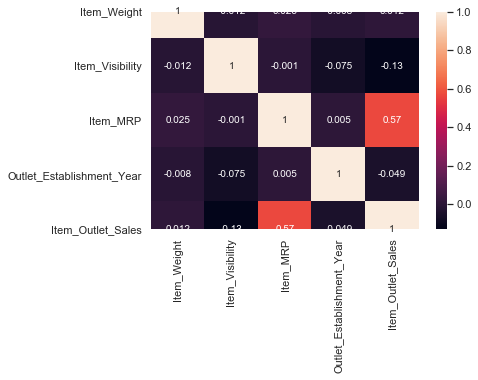

In [20]:
sns.heatmap(train.corr().round(3), annot=True)

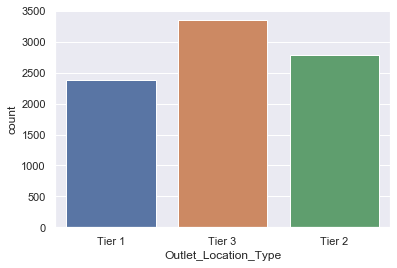

In [21]:
sns.countplot(x='Outlet_Location_Type', data=train)

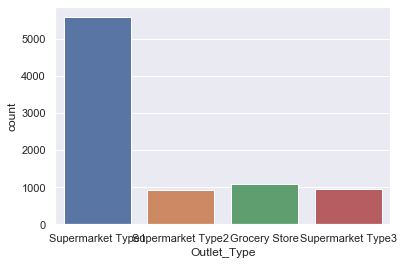

In [22]:
sns.countplot(x='Outlet_Type', data=train)

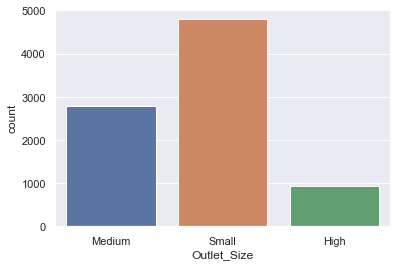

In [23]:
sns.countplot(x='Outlet_Size', data=train)

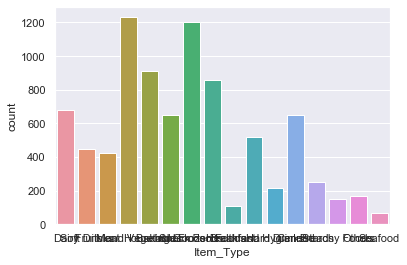

In [24]:
sns.countplot(x='Item_Type', data=train)

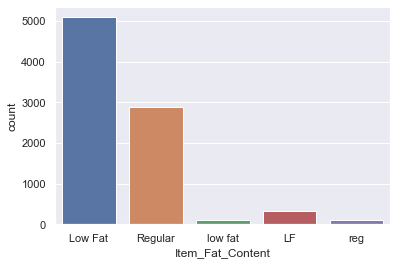

In [25]:
sns.countplot(x='Item_Fat_Content', data=train)

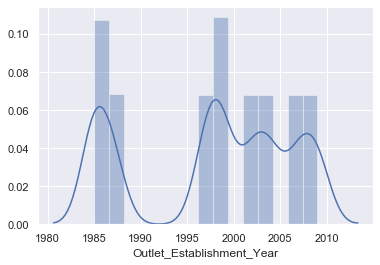

In [26]:
sns.distplot(train['Outlet_Establishment_Year'])

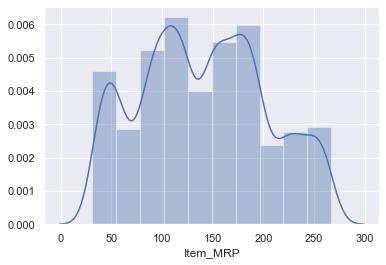

In [27]:
sns.distplot(train['Item_MRP'], bins=10)

In [28]:
#sns.distplot(train['Item_Weight'])
px.histogram(train, x='Item_Weight', marginal='box')

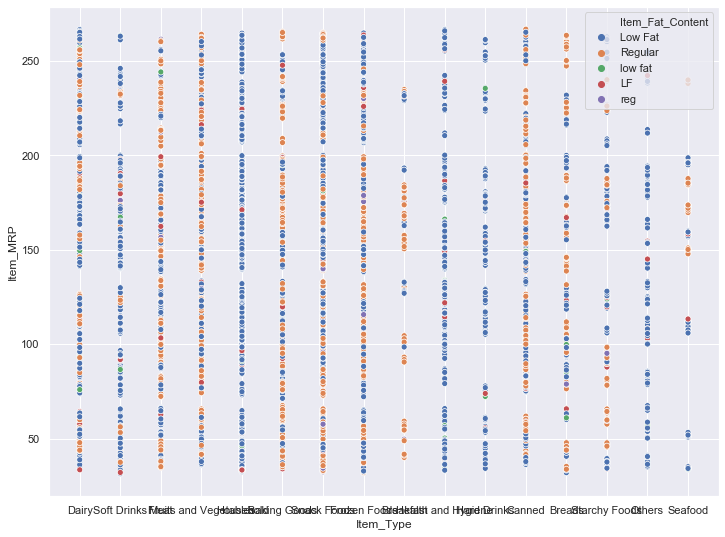

In [60]:
sns.scatterplot(x='Item_Type', y='Item_MRP', data=train, hue='Item_Fat_Content')

In [29]:
px.scatter(train, x='Item_Type', y='Item_MRP',color='Item_Fat_Content')

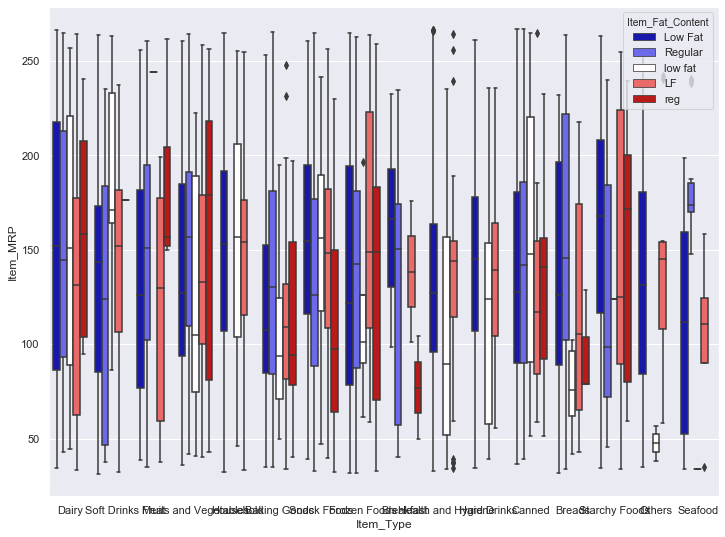

In [24]:
sns.boxplot(x='Item_Type', y='Item_MRP', data = train, hue='Item_Fat_Content', palette='seismic')

In [30]:
px.histogram(train,x='Item_Visibility')

In [71]:
train.dtypes == 'object'

Item_Identifier               True
Item_Weight                  False
Item_Fat_Content              True
Item_Visibility              False
Item_Type                     True
Item_MRP                     False
Outlet_Identifier             True
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type          True
Outlet_Type                   True
Item_Outlet_Sales            False
dtype: bool

In [31]:
px.parallel_categories(train, dimensions=['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Location_Type'])

# Feature Engineering

In [12]:
# Modify the categories of the Item Fat Content
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [13]:
# Create a broad category of type of Item

#Get the first 2 characters from the ID
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda a: a[0:2])

#Rename to more intuitive categories; Food, Drinks and Non-Consumables
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

#View the results
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [14]:
#Make non-consumables as a separate category in low_fat
train.loc[train['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] == 'Non-Edible'


4       False
16      False
22      False
25      False
31      False
35      False
46      False
50      False
54      False
56      False
69      False
74      False
83      False
94      False
98      False
120     False
129     False
131     False
132     False
135     False
139     False
140     False
141     False
142     False
143     False
147     False
149     False
155     False
168     False
170     False
        ...  
8378    False
8383    False
8385    False
8388    False
8390    False
8398    False
8400    False
8409    False
8410    False
8417    False
8430    False
8440    False
8445    False
8452    False
8454    False
8456    False
8471    False
8472    False
8474    False
8475    False
8476    False
8488    False
8494    False
8498    False
8499    False
8500    False
8502    False
8504    False
8516    False
8520    False
Name: Item_Fat_Content, Length: 1599, dtype: bool

In [15]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [16]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda a: a[0:2])

#Rename to more intuitive categories; Food, Drinks and Non-Consumables
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

#View the results
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

In [17]:
# Numerical and One-Hot Coding of Categorical Values
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()

In [23]:
train['Outlet'] = le.fit_transform(train['Outlet_Identifier'])

In [24]:
var_mod = ['Item_Fat_Content', 'Item_Type_Combined', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet', 'Outlet_Size']
le = LabelEncoder()
for i in var_mod:
    train[i] = le.fit_transform(train[i])

In [25]:
#One-Hot Coding
train = pd.get_dummies(train, columns=['Item_Fat_Content', 'Item_Type_Combined', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet', 'Outlet_Size'])

In [27]:
test['Outlet'] = le.fit_transform(test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Item_Type_Combined', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet', 'Outlet_Size']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])

test = pd.get_dummies(test, columns=['Item_Fat_Content', 'Item_Type_Combined', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet', 'Outlet_Size'])

In [37]:
train.drop(['Item_Type'], axis=1,inplace=True)

In [39]:
train.drop(['Outlet_Establishment_Year'], axis=1, inplace=True)

# Test Set
Perform Data Cleaning Operations on the Test data set

In [32]:
test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.8622            OUT049                       1999      Medium   
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [34]:
test.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695633         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412000                1987.000000
50%      12.500000         0.054154   141.415400                1999.000000
75%      16.700000         0.093463   186.026600                2004.000000
max      21.350000         0.323637   266.588400                2009.000000

In [35]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
#Fill up the missing values as done in the train set
test['Item_Weight'] = test['Item_Weight'].fillna((test['Item_Weight'].mean()))
outlet_size_mode = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: mode(x).mode[0])

miss_outlet = test.Outlet_Size.isnull()
test.loc[miss_outlet, 'Outlet_Size'] = test.loc[miss_outlet,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [37]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [20]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

In [21]:
test.Item_Fat_Content.value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

Some Data visualisations for the Test Set

In [22]:
px.parallel_categories(test, dimensions=['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Location_Type'])

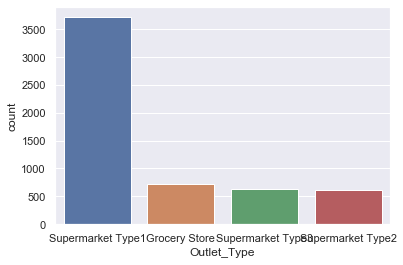

In [39]:
sns.countplot(x='Outlet_Type', data=test)

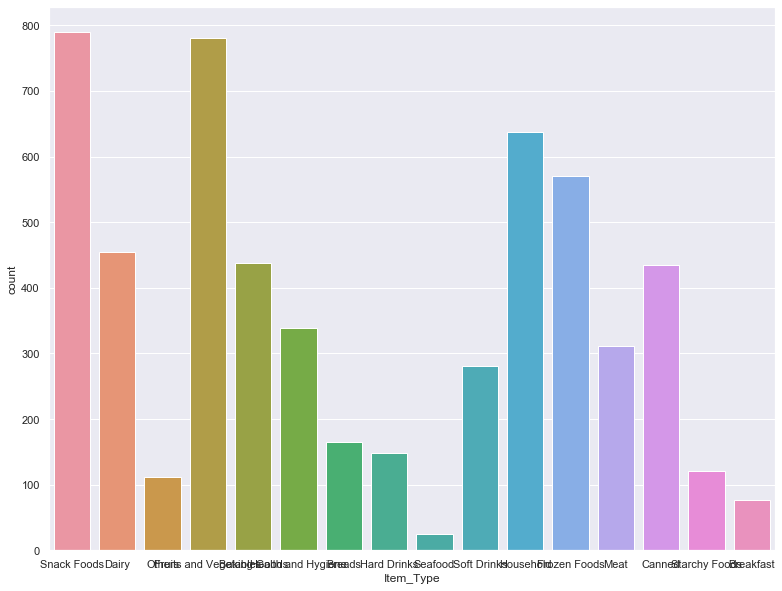

In [42]:
sns.countplot(x='Item_Type', data=test)

# Model Building BigMart Sales


In [31]:
# Base-line Model
mean_sales = train['Item_Outlet_Sales'].mean()
#Submission DataFrame

base_1 = test[['Item_Identifier', 'Outlet_Identifier']]
base_1['Item_Outlet_Sales'] = mean_sales

#Export Submission File
base_1.to_csv('alg0.csv', index=False)

In [48]:
#Create function to run through the data pipeline
target = 'Item_Outlet_Sales'
IDCol = ['Item_Identifier', 'Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def modelfit(algorithm, dtrain, dtest, predictors, target, IDCol, filename):
    #Fit the algorithm on the data set
    algorithm.fit(dtrain[predictors], dtrain[target])

    #Predict training set
    dtrain_predictions = algorithm.predict(dtrain[predictors])

    #Perform cross-validation
    cv_score = cross_val_score(algorithm, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')     
    cv_score = np.sqrt(np.abs(cv_score))

    #Print model Report
    print ('\nModel Report')
    print ('RMSE : %.4g' % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print ("CV Score: Mean - %.4g | Std - %.4g' | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))
    
    #Predict on testing data
    dtest[target] = algorithm.predict(dtest[predictors])

    #Export submission file
    IDCol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDCol})
    submission.to_csv(filename, index=False)

# Linear Regression Model


Model Report
RMSE : 1128
CV Score: Mean - 1129 | Std - 43.38' | Min - 1074 | Max - 1211


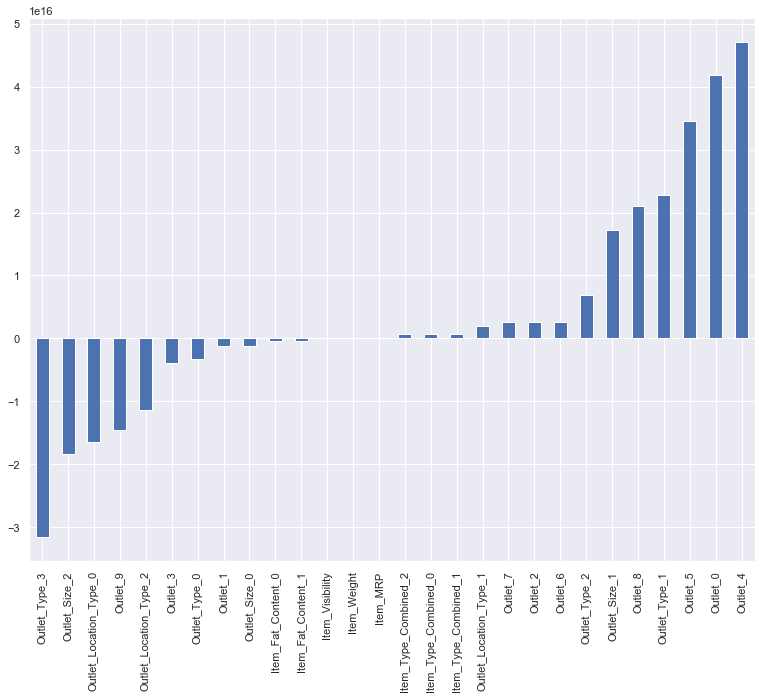

In [49]:
from sklearn.linear_model import LinearRegression, Ridge

predictors = [x for x in train.columns if x not in [target]+IDCol]

#Print Predictors
linearAlg = LinearRegression(normalize=True)
modelfit(linearAlg, train, test, predictors, target, IDCol, 'linearRegSubmission.csv')
coef1 = pd.Series(linearAlg.coef_, predictors).sort_values()
coef1.plot(kind='bar')

## Ridge Regression Model


Model Report
RMSE : 1128
CV Score: Mean - 1130 | Std - 44.76' | Min - 1076 | Max - 1217


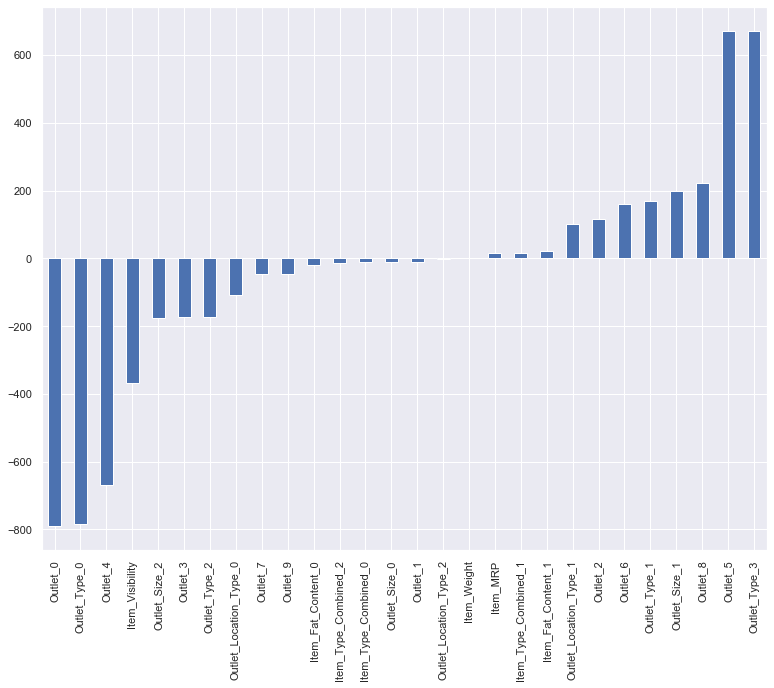

In [53]:
predictors = [x for x in train.columns if x not in [target]+IDCol]

#Print Predictors
ridgeAlg = Ridge(alpha=0.05,normalize=True)
modelfit(ridgeAlg, train, test, predictors, target, IDCol, 'ridgeRegSubmission.csv')
coef2 = pd.Series(ridgeAlg.coef_, predictors).sort_values()
coef2.plot(kind='bar')

## Decision Tree Model

In [56]:
from sklearn.tree import DecisionTreeRegressor
decTreeAlg = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)


Model Report
RMSE : 1058
CV Score: Mean - 1090 | Std - 44.73' | Min - 1014 | Max - 1180


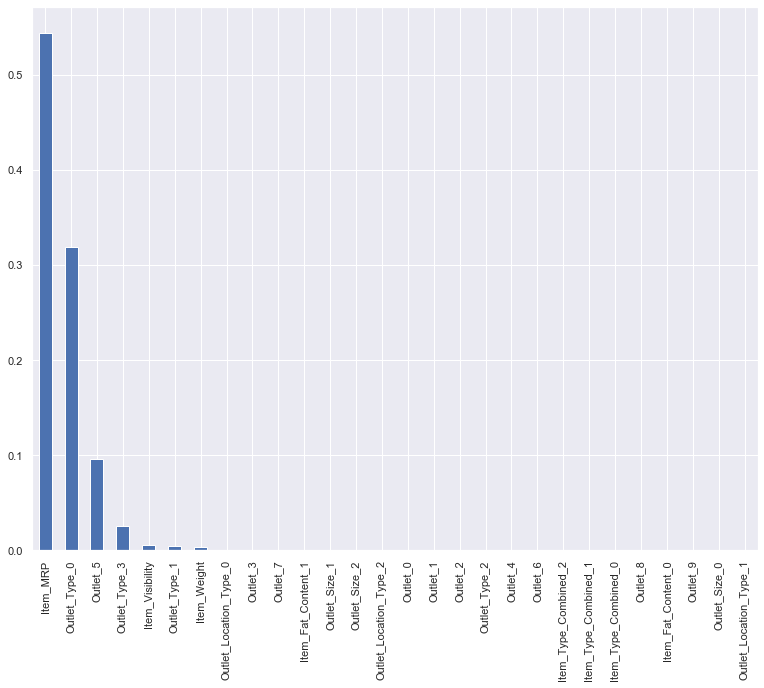

In [59]:
modelfit(decTreeAlg, train, test, predictors, target, IDCol, 'dTreeRegSubmission.csv')
coef3 = pd.Series(decTreeAlg.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar')


Model Report
RMSE : 1074
CV Score: Mean - 1096 | Std - 43.6' | Min - 1034 | Max - 1174


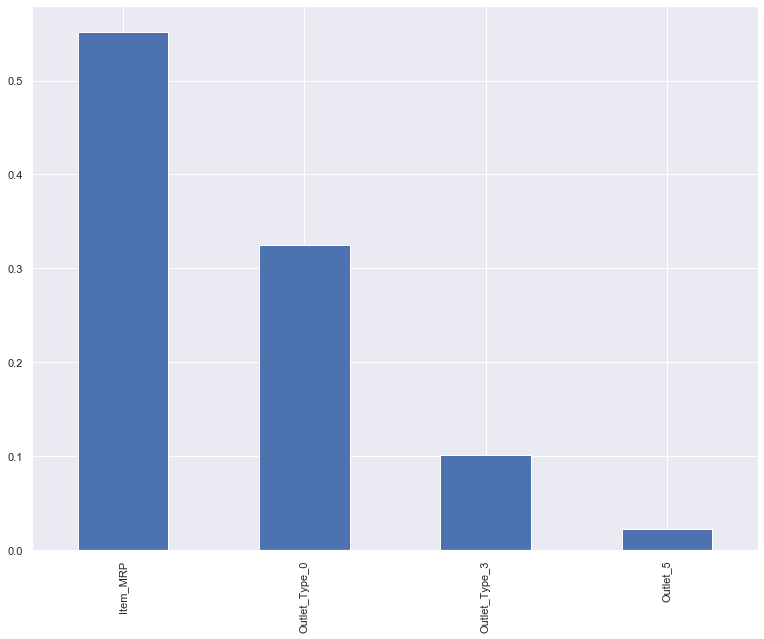

In [66]:
predictors2 = ['Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Outlet_Type_3']
decTreeAlg2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(decTreeAlg2, train, test, predictors2, target, IDCol, 'dTreeRegSubmission02.csv')
coef4 = pd.Series(decTreeAlg2.feature_importances_, predictors2).sort_values(ascending=False)
coef4.plot(kind='bar')

## Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


Model Report
RMSE : 1062
CV Score: Mean - 1083 | Std - 42.69' | Min - 1025 | Max - 1162


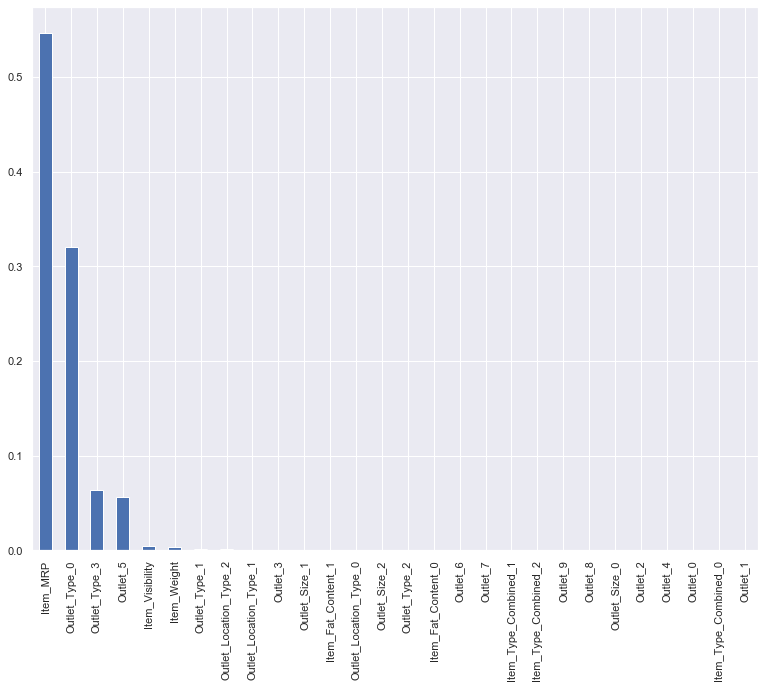

In [68]:
randForAlg = RandomForestRegressor(n_estimators=200, max_depth=10, n_jobs=5, min_samples_leaf=100)
modelfit(randForAlg, train, test, predictors, target, IDCol, 'randForSubmission.csv')
coef5 = pd.Series(randForAlg.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar')

## Gradient Boost


Model Report
RMSE : 978.4
CV Score: Mean - 1097 | Std - 48.63' | Min - 1023 | Max - 1181


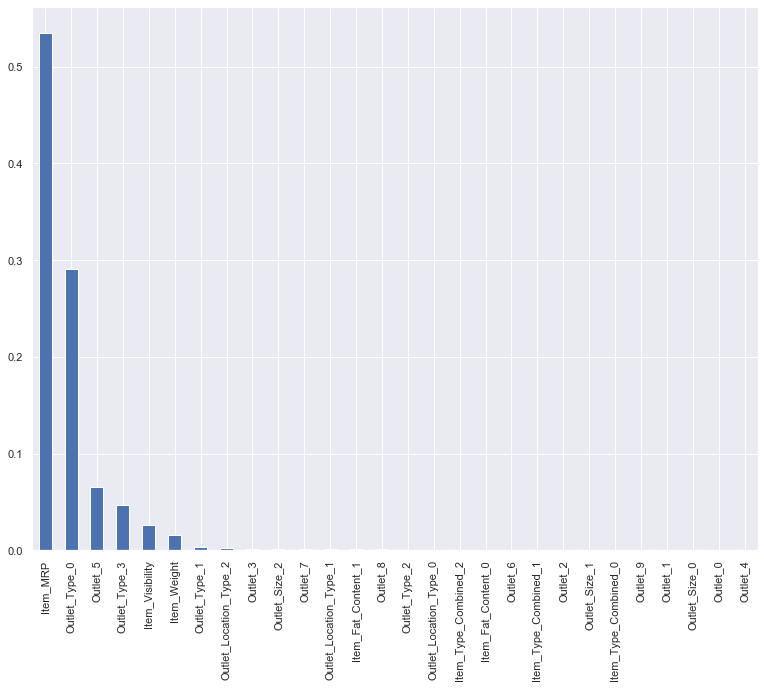

In [70]:
gradBoAlg = GradientBoostingRegressor(n_estimators=200, max_depth=10, min_samples_leaf=150)
modelfit(gradBoAlg, train, test, predictors, target, IDCol, 'gradBoSubmission.csv')
coef6 = pd.Series(gradBoAlg.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar')


Model Report
RMSE : 998.2
CV Score: Mean - 1096 | Std - 46.25' | Min - 1017 | Max - 1185


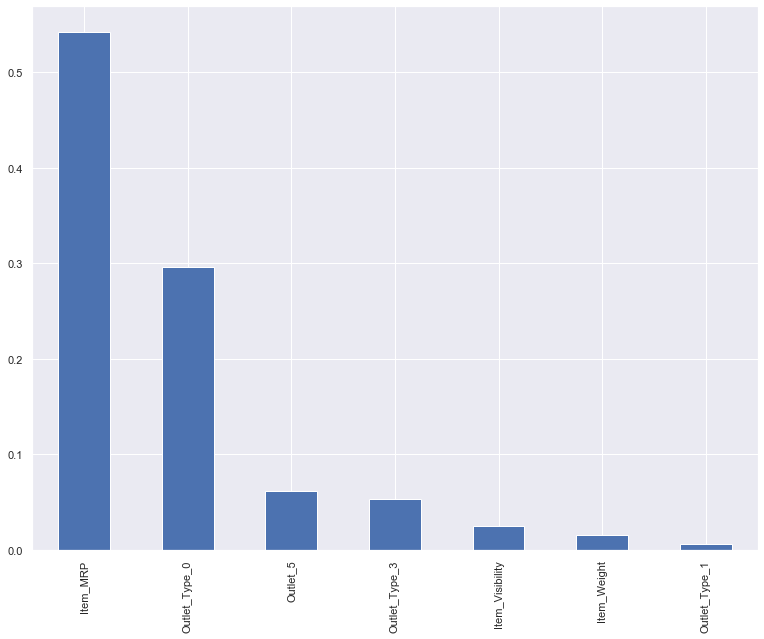

In [72]:
predictors3 = ['Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Outlet_Type_3', 'Item_Visibility', 'Item_Weight', 'Outlet_Type_1']
gradBoAlg = GradientBoostingRegressor(n_estimators=250, max_depth=10, min_samples_leaf=200)
modelfit(gradBoAlg, train, test, predictors3, target, IDCol, 'gradBoSubmission02.csv')
coef7 = pd.Series(gradBoAlg.feature_importances_, predictors3).sort_values(ascending=False)
coef7.plot(kind='bar')

## Neural Networks

In [73]:
from sklearn.neural_network import MLPRegressor

In [76]:
nnAlg = MLPRegressor(verbose=False,hidden_layer_sizes=(20,100,10))
modelfit(nnAlg, train, test, predictors, target, IDCol, 'nnSubmission.csv')



Model Report
RMSE : 1071
CV Score: Mean - 1075 | Std - 42.9' | Min - 1007 | Max - 1154
